In [1]:
import pandas as pd
import numpy as np
import get_prices as hist
import tensorflow as tf
from preprocessing import DataProcessing
import pandas_datareader.data as pdr
import yfinance as fix
fix.pdr_override()

start = "2014-10-24"
end = "2019-10-21"
#Getting data
hist.get_stock_data("AAPL", start_date=start, end_date=end)
process = DataProcessing("stock_prices.csv", 0.9)
process.gen_test(10)
process.gen_train(10)

#processing data into train and test data
X_train = process.X_train.reshape((1109, 10, 1)) / 200
Y_train = process.Y_train / 200

X_test = process.X_test.reshape(109, 10, 1) / 200
Y_test = process.Y_test / 200

#building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu)) #ramp function

model.compile(optimizer="adam", loss="mean_squared_error") #adaptive learning rate 
model.summary

#training model
model.fit(X_train, Y_train, epochs=50)
#print(X_train,Y_train)

#testing model
print(model.evaluate(X_test, Y_test)) #loss in test mode




[*********************100%***********************]  1 of 1 downloaded


C:\Users\prpat\Desktop\IntroNeuralNetworks-master\get_prices.py:32: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  stock_data.to_csv("stock_prices.csv")


Train on 1109 samples
Epoch 1/50
1109/1109 [==============================] - 7s 7ms/sample - loss: 0.1076
Epoch 2/50
1109/1109 [==============================] - 1s 586us/sample - loss: 0.0067
Epoch 3/50
1109/1109 [==============================] - 1s 496us/sample - loss: 0.0037
Epoch 4/50
1109/1109 [==============================] - 1s 542us/sample - loss: 0.0018
Epoch 5/50
1109/1109 [==============================] - 1s 507us/sample - loss: 9.1487e-04
Epoch 6/50
1109/1109 [==============================] - 1s 533us/sample - loss: 7.1807e-04
Epoch 7/50
1109/1109 [==============================] - 1s 511us/sample - loss: 7.0348e-04
Epoch 8/50
1109/1109 [==============================] - 1s 510us/sample - loss: 7.0109e-04
Epoch 9/50
1109/1109 [==============================] - 1s 543us/sample - loss: 7.0275e-04
Epoch 10/50
1109/1109 [==============================] - 1s 535us/sample - loss: 6.8675e-04
Epoch 11/50
1109/1109 [==============================] - 1s 569us/sample - loss: 7.04

In [2]:
#data = pdr.get_data_yahoo("AAPL", "2019-09-20", "2019-10-03")
data = pdr.get_data_yahoo("AAPL", "2019-01-02", "2019-10-03")
#print (data.head())
stock = data["Adj Close"]
data=data.reset_index()

date=[data["Date"][x] for x in range(0,190,10)]
date.append(data["Date"][99])

X_predict = np.array(stock).reshape((19,10,1)) 
actual_price=np.array([X_predict[x][0] for x in range(1,19)])
actual_price=np.append(actual_price,pdr.get_data_yahoo("AAPL", "2019-10-03", "2019-10-03")["Adj Close"])
X_predict=X_predict/200

predicted_price = model.predict(X_predict)*200

actual_price=[i for i in actual_price]
predicted_price=[float(x) for x in predicted_price]
#print(actual_price)
#print(predicted_price)
#print(date)
 
df = pd.DataFrame(list(zip(date, actual_price, predicted_price)), columns =['Date', 'Actual Price','Predicted Price'])
df



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Date,Actual Price,Predicted Price
0,2019-01-02,153.10,149.229568
1,2019-01-16,164.47,153.991165
2,2019-01-31,169.50,168.844513
3,2019-02-14,173.64,171.095993
4,2019-03-01,184.70,175.287460
5,2019-03-15,188.51,186.833878
6,2019-03-29,197.36,193.916138
7,2019-04-12,203.05,200.522324
8,2019-04-29,185.02,202.134415
9,2019-05-13,177.56,184.451675


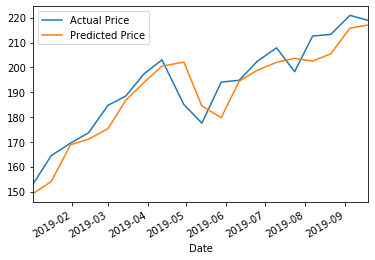

In [4]:
df.plot(x ='Date', y=['Actual Price','Predicted Price'], kind = 'line')
